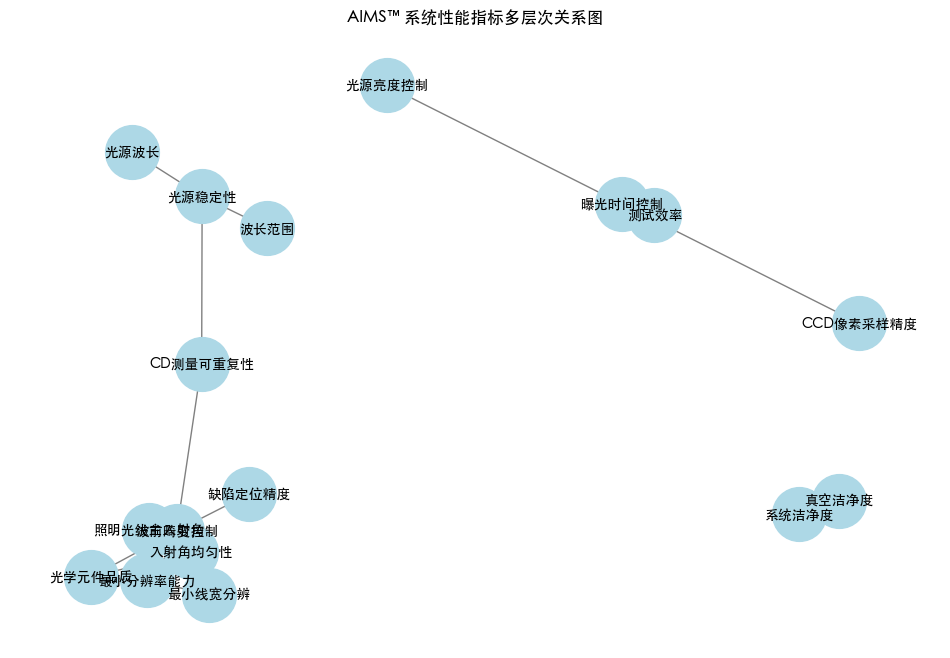

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager

# # 手动设置字体路径
# font_path = None

# # Windows 系统中常见的中文字体路径
# windows_fonts = ["C:/Windows/Fonts/simhei.ttf", "C:/Windows/Fonts/msyh.ttc"]

# # macOS 系统中常见的中文字体路径
# mac_fonts = ["/System/Library/Fonts/STHeiti Medium.ttc", "/System/Library/Fonts/PingFang.ttc"]

# # Linux 系统可能有的中文字体
# linux_fonts = ["/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"]

# # 检查字体路径是否存在
# for path in windows_fonts + mac_fonts + linux_fonts:
#     if font_manager.Path(path).exists():
#         font_path = path
#         break

# if font_path is None:
#     raise FileNotFoundError("找不到系统中可用的中文字体，请手动指定字体路径。")

# # 使用找到的字体设置字体属性
# from matplotlib import rcParams
# rcParams['font.sans-serif'] = [font_manager.FontProperties(fname=font_path).get_name()]
# rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题

# 创建有向图
G = nx.DiGraph()

# 添加节点 (一级指标)
G.add_node("最小线宽分辨", layer="一级")
G.add_node("CD测量可重复性", layer="一级")
G.add_node("缺陷定位精度", layer="一级")
G.add_node("波长范围", layer="一级")
G.add_node("照明光线主入射角", layer="一级")
G.add_node("系统洁净度", layer="一级")
G.add_node("测试效率", layer="一级")

# 添加节点 (二级性能指标)
G.add_node("最小分辨率能力", layer="二级")
G.add_node("光源稳定性", layer="二级")
G.add_node("波前畸变控制", layer="二级")
G.add_node("入射角均匀性", layer="二级")
G.add_node("真空洁净度", layer="二级")
G.add_node("曝光时间控制", layer="二级")

# 添加节点 (三级指标)
G.add_node("光源波长", layer="三级")
G.add_node("光学元件品质", layer="三级")
G.add_node("CCD像素采样精度", layer="三级")
G.add_node("光源亮度控制", layer="三级")

# 添加边 (一级 -> 二级)
G.add_edge("最小线宽分辨", "最小分辨率能力")
G.add_edge("CD测量可重复性", "光源稳定性")
G.add_edge("CD测量可重复性", "波前畸变控制")
G.add_edge("缺陷定位精度", "波前畸变控制")
G.add_edge("波长范围", "光源稳定性")
G.add_edge("照明光线主入射角", "入射角均匀性")
G.add_edge("系统洁净度", "真空洁净度")
G.add_edge("测试效率", "曝光时间控制")

# 添加边 (二级 -> 三级)
G.add_edge("最小分辨率能力", "光学元件品质")
G.add_edge("光源稳定性", "光源波长")
G.add_edge("波前畸变控制", "光学元件品质")
G.add_edge("入射角均匀性", "光学元件品质")
G.add_edge("曝光时间控制", "光源亮度控制")
G.add_edge("曝光时间控制", "CCD像素采样精度")

# 绘制网络图
pos = nx.spring_layout(G)  # 使用 spring_layout 布局来均匀分布节点
plt.figure(figsize=(12, 8))

# 绘制节点和边
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='->', arrowsize=20, edge_color='gray')

# 绘制节点标签，使用全局字体设置
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# 设置标题
plt.title("AIMS™ 系统性能指标多层次关系图")
plt.axis('off')
plt.show()